In [17]:
from medvqa.datasets.mimiccxr.metadata_agregation import MIMICCXR_MetadataAgregator
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import load_scene_graph
from importlib import reload
import medvqa

In [16]:
reload(medvqa.datasets.mimiccxr.metadata_agregation)

<module 'medvqa.datasets.mimiccxr.metadata_agregation' from '/home/pamessina/medvqa/medvqa/datasets/mimiccxr/metadata_agregation.py'>

In [18]:
ag = MIMICCXR_MetadataAgregator(
    qa_adapted_reports_filename="qa_adapted_reports__20220904_095810.json",
    chexpert_labels_filename="chexpert_labels_per_report__20220904_113605.pkl",
    chest_imagenome_label_names_filename="labels(min_freq=0).pkl",
    chest_imagenome_labels_filename="imageId2labels(min_freq=0).pkl",
)

In [23]:
from pprint import pprint
tmp = []
for x in ag.chest_imagenome_label_names:
    if len(x) == 2:
        tmp.append(x[1])
tmp.sort()
pprint(tmp)

In [24]:
ag.print_metadata(135896)

Report ID:  135896

backgrounds
history: Incarcerated hernia, sepsis, vent dependence. Question interval change.

reports


part_ids
15

subject_ids
15831124

study_ids
52284576

dicom_id_view_pos_pairs
[('d9f1d1b6-5debb1db-9c9e4381-eeb26494-9a516eb4', 'AP')]

splits
train

filepaths
/mnt/data/mimic-cxr/files/p15/p15831124/s52284576.txt

Chexpert Labels:
No Finding
[1 0 0 0 0 0 0 0 0 0 0 0 0 0]

Chest Imagenome Labels:
(cardiac silhouette, anatomicalfinding, enlarged cardiac silhouette)
(cardiac silhouette, nlp, abnormal)
(cavoatrial junction, tubesandlines, ij line)
(left hilar structures, anatomicalfinding, lung opacity)
(left hilar structures, anatomicalfinding, pulmonary edema/hazy opacity)
(left hilar structures, nlp, abnormal)
(left lower lung zone, anatomicalfinding, atelectasis)
(left lower lung zone, anatomicalfinding, consolidation)
(left lower lung zone, anatomicalfinding, lobar/segmental collapse)
(left lower lung zone, anatomicalfinding, lung opacity)
(left lower lung zone

In [19]:
from pprint import pprint
pprint(ag.integrate_metadata(165594))

{'chest_imagenome_labels': {},
 'chexpert_labels': {},
 'common_labels': {},
 'dicom_id_view_pos_pairs': [('aede4bcf-40226ac5-d9e02bc1-7eea9f83-b27515cc',
                              'UNK'),
                             ('c5973f31-8c1d84cb-1ef63d63-6e13dc88-d6e4c1f2',
                              'UNK')],
 'original_image_sizes': {'aede4bcf-40226ac5-d9e02bc1-7eea9f83-b27515cc': (1760,
                                                                           2140),
                          'c5973f31-8c1d84cb-1ef63d63-6e13dc88-d6e4c1f2': (1760,
                                                                           2140)},
 'original_report': '                                 FINAL REPORT\n'
                    ' TYPE OF EXAMINATION:  Chest PA and lateral.\n'
                    ' \n'
                    ' INDICATION:  ___-year-old female patient with cough and '
                    'some blood in sputum. \n'
                    ' It could be from bronchitis, but the patient has 

In [2]:
from medvqa.datasets.mimiccxr import visualize_image_report_and_other_images

dicom_id = cff78879-9792e4e1-d46e75df-8e23036a-e42e01ba
image_path = /mnt/data/mimic-cxr-jpg/images/p10/p10337260/s58067276/cff78879-9792e4e1-d46e75df-8e23036a-e42e01ba.jpg


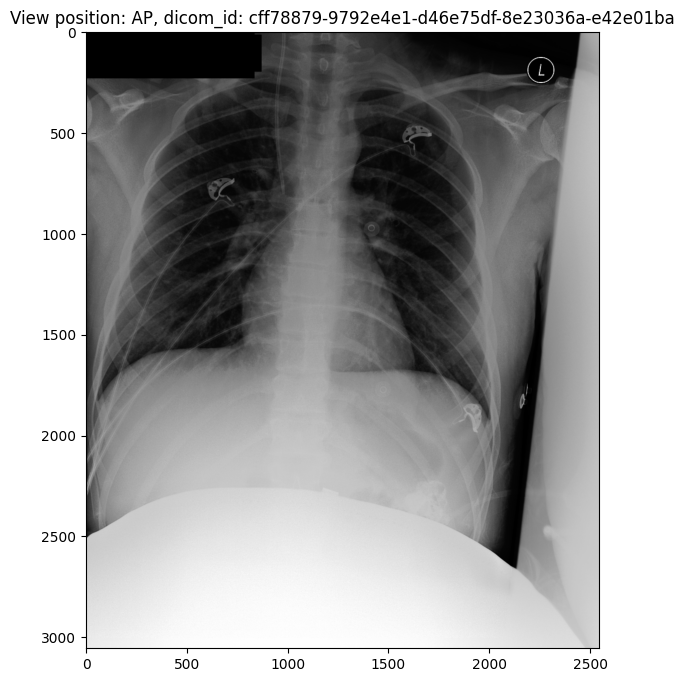


--------------------------------------------------------------------------------
Original report:
                                 FINAL REPORT
 HISTORY:  New right internal jugular central venous catheter placement.
 
 TECHNIQUE:  PA and lateral views of the chest.
 
 COMPARISON:  ___.
 
 FINDINGS:
 
 Right internal jugular central venous catheter tip terminates in the upper
 SVC.  No pneumothorax is visualized.  The cardiac, mediastinal and hilar
 contours are normal.  Lungs are clear without focal consolidation.  No pleural
 effusion is demonstrated.  Oral contrast material is seen within bowel loops
 within the left upper quadrant of the abdomen.
 
 IMPRESSION:
 
 Right internal jugular central venous catheter tip in the upper SVC.  No
 pneumothorax.


--------------------------------------------------------------------------------
No other images


In [3]:
visualize_image_report_and_other_images('cff78879-9792e4e1-d46e75df-8e23036a-e42e01ba')

In [15]:
from pprint import pprint
pprint(ag.integrate_metadata(165594, save_path='/home/pamessina/radiology_annotation_web_app_2/report_metadata_3.json'))

Saved to /home/pamessina/radiology_annotation_web_app_2/report_metadata_3.json
{'chexpert_labels': {},
 'dicom_id_view_pos_pairs': [('aede4bcf-40226ac5-d9e02bc1-7eea9f83-b27515cc',
                              nan),
                             ('c5973f31-8c1d84cb-1ef63d63-6e13dc88-d6e4c1f2',
                              nan)],
 'original_image_sizes': {'aede4bcf-40226ac5-d9e02bc1-7eea9f83-b27515cc': (1760,
                                                                           2140),
                          'c5973f31-8c1d84cb-1ef63d63-6e13dc88-d6e4c1f2': (1760,
                                                                           2140)},
 'original_report': '                                 FINAL REPORT\n'
                    ' TYPE OF EXAMINATION:  Chest PA and lateral.\n'
                    ' \n'
                    ' INDICATION:  ___-year-old female patient with cough and '
                    'some blood in sputum. \n'
                    ' It could be from bronchitis

In [20]:
!python ../../scripts/chest_imagenome/precompute_sentence2labels.py \
--num_workers 8

Loading scene graphs...
Elapsed time: 895.49 seconds
Loaded 243310 scene graphs
Computing phrases to observations and anatomies...
 32%|██████████▊                       | 76955/243310 [00:11<00:24, 6849.10it/s]Warning: "Right lower lobe opacity concerning for pneumonia." has different anatomies than before (old: {'right mid lung zone', 'right lung', 'right lower lung zone'}, new: {'right lung'})


 50%|████████████████▌                | 122314/243310 [00:17<00:17, 6750.42it/s]Warning: "In comparison" has different anatomies than before (old: {'upper mediastinum', 'left arm', 'svc', 'left clavicle', 'right arm'}, new: {'left lung', 'right lung'})


 74%|████████████████████████▌        | 180711/243310 [00:25<00:08, 7171.73it/s]Warning: "In comparison" has different anatomies than before (old: {'upper mediastinum', 'left arm', 'svc', 'left clavicle', 'right arm'}, new: {'left hemidiaphragm', 'right hemidiaphragm'})


 91%|██████████████████████████████▏  | 222518/243310 [00:32<00:03, 6539.00it/s]Warning: "Allowing for differences in technique" has different anatomies than before (old: {'unknown'}, new: {'left lung', 'right lung'})


100%|█████████████████████████████████| 243310/243310 [00:35<00:00, 6880.32it/s]
Found 556111 unique phrases
Found 80 unique observations
Found 39 unique anatomies
Computing observation labels numpy array...
labels_o.shape: (556111, 80)
Computing anatomy labels numpy array...
labels_a.shape: (556111, 39)
Filtering observation labels with low frequency...
labels_o.shape: (556111, 76)
Saving output...
Saved to /mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/phrases2labels(num_obs=76,num_anat=39,num_phrases=556111).pkl


In [21]:
from medvqa.utils.files import load_pickle

In [32]:
!ls -lh "/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/phrases2labels(num_obs=76,num_anat=39,num_phrases=556111).pkl"

-rw-rw-r-- 1 pamessina pamessina 538M Aug 15 13:57 '/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/phrases2labels(num_obs=76,num_anat=39,num_phrases=556111).pkl'


In [33]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/chest_imagenome/phrases2labels(num_obs=76,num_anat=39,num_phrases=556111).pkl')

In [34]:
tmp.keys()

dict_keys(['phrases', 'observation_labels', 'anatomy_labels', 'anatomy_names', 'observation_names'])

In [24]:
tmp['phrases'][-1]

'yo M hx of Sarcoma p/w LLL pulmonary nodules s/p L VATS wedge resection x 2'

In [36]:
len(tmp['observation_names']), len(tmp['anatomy_names'])

(76, 39)

In [57]:
unk_idx = tmp['anatomy_names'].index('left clavicle')
count = 0
for i, x in enumerate(tmp['anatomy_labels']):
    if count == 5:
        break
    if x[unk_idx] == 1:
        print(tmp['phrases'][i])
        print()
        for j, y in enumerate(tmp['observation_labels'][i]):
            if y != 2:
                print(tmp['observation_names'][j], y)
        print()
        for j, y in enumerate(x):
            if y == 1:
                print(tmp['anatomy_names'][j])
        print('---------------------')
        count += 1

-ET tube lies 8 cm above the carina at the level of midclavicular heads.

tubesandlines|endotracheal tube 1

carina
left clavicle
neck
right clavicle
trachea
---------------------
-In addition, as before, the left subclavian central line does not cross the midline to reach the SVC.

tubesandlines|subclavian line 1

left clavicle
mediastinum
svc
---------------------
1 CONSIDERATIONS ARE MADE FOR LOWER LUNG VOLUMES AND PATIENT ROTATION, CARDIOMEDIASTINAL CONTOURS ARE CONSIDERED STABLE.

technicalassessment|low lung volumes 1
technicalassessment|rotated 1

cardiac silhouette
left clavicle
left lower lung zone
left lung
mediastinum
right clavicle
right lower lung zone
right lung
spine
---------------------
1. 5 mm nodular density projecting over the left upper lobe, at the intersection of the first anterior rib and clavicle.

anatomicalfinding|bone lesion 1
anatomicalfinding|lung opacity 1
nlp|abnormal 1

left chest wall
left clavicle
left lung
left mid lung zone
left upper lung zone
----

In [62]:
# for x in tmp['anatomy_names']:
#     print(x)
pprint(tmp['anatomy_names'])

['abdomen',
 'aortic arch',
 'cardiac silhouette',
 'carina',
 'cavoatrial junction',
 'left apical zone',
 'left arm',
 'left breast',
 'left chest wall',
 'left clavicle',
 'left costophrenic angle',
 'left hemidiaphragm',
 'left hilar structures',
 'left lower lung zone',
 'left lung',
 'left mid lung zone',
 'left shoulder',
 'left upper lung zone',
 'mediastinum',
 'neck',
 'right apical zone',
 'right arm',
 'right atrium',
 'right breast',
 'right chest wall',
 'right clavicle',
 'right costophrenic angle',
 'right hemidiaphragm',
 'right hilar structures',
 'right lower lung zone',
 'right lung',
 'right mid lung zone',
 'right shoulder',
 'right upper lung zone',
 'spine',
 'svc',
 'trachea',
 'unknown',
 'upper mediastinum']


In [41]:
tmp['anatomy_labels']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
import numpy as np
idxs = np.argsort(np.array([len(x) for x in tmp['phrases']]))

In [45]:
tmp['phrases'][idxs[-100]]

'The left basal consolidation as well as right basal opacities have substantially improved in the interim as well as there is improvement of vascular engorgement with still present left retrocardiac opacity might reflect sequela of prior infectious process and reassessment in three to four weeks for continued documentation of improvement is required.'

In [51]:
idx = idxs[-50001]
print(tmp['phrases'][idx])
print()
for i, x in enumerate(tmp['observation_labels'][idx]):
    if x != 2:
        print(tmp['observation_names'][i], x)
print()
for i, x in enumerate(tmp['anatomy_labels'][idx]):
    if x == 1:
        print(tmp['anatomy_names'][i])

If there is an appropriate clinical history to suggest possible central obstructing lesion leading to failure to clear a pneumonia, CT could be obtained.

anatomicalfinding|lung lesion 1
anatomicalfinding|lung opacity 1
anatomicalfinding|mass/nodule (not otherwise specified) 1
disease|pneumonia 0
nlp|abnormal 1
nlp|normal 1

left lung
right lung


In [113]:
lidx = tmp['label_names'].index('diaphragmatic eventration (benign)')
for i in range(labels.shape[0]):
    if labels[i, lidx] != 2:
        print(' '.join(tmp['phrases'][i].split()))
        for j, x in enumerate(labels[i]):
            if x != 2:
                print('\t', tmp['label_names'][j], x)

2. Elevation of left hemidiaphragm may be related to diaphragmatic eventration, or diaphragmatic paralysis.
	 abnormal 1
	 diaphragmatic eventration (benign) 1
	 elevated hemidiaphragm 1
2. Right diaphragmatic eventration.
	 diaphragmatic eventration (benign) 1
2. Right diaphragmatic eventration.
	 diaphragmatic eventration (benign) 1
2. Unchanged appearance of right diaphragmatic eventration.
	 diaphragmatic eventration (benign) 1
3. Right diaphragmatic eventration.
	 diaphragmatic eventration (benign) 1
A bulge in the right diaphragmatic contour laterally is presumably an abdominal organ protruding through a diaphragmatic eventration or hernia, from the right upper abdominal quadrant.
	 abnormal 1
	 diaphragmatic eventration (benign) 1
	 hernia 1
A right diaphragmatic eventration is unchanged.
	 diaphragmatic eventration (benign) 1
A right-sided diaphragmatic eventration is re- demonstrated.
	 diaphragmatic eventration (benign) 1
A rounded 3.8 cm opacity at the left hemidiaphragm cou

There is slightly lobular contour of the right hemidiaphragm, likely diaphragmatic eventration.
	 diaphragmatic eventration (benign) 1
There is a slight irregularity to the right hemidiaphragm, likely from a small diaphragmatic eventration.
	 diaphragmatic eventration (benign) 1
There is elevation of the anterior portion of the right hemidiaphragm consistent with diaphragmatic eventration.
	 abnormal 1
	 diaphragmatic eventration (benign) 1
	 elevated hemidiaphragm 1
There is mild elevation of the right hemidiaphragm, likely caused by diaphragmatic eventration.
	 abnormal 1
	 diaphragmatic eventration (benign) 1
	 elevated hemidiaphragm 1
There is moderate right diaphragmatic eventration, similar to prior studies.
	 diaphragmatic eventration (benign) 1
There is no lobar collapse, so the findings suggest severe progression of diaphragmatic eventration or development of a paralyzed or otherwise non-functioning left hemidiaphragm over the past year.
	 atelectasis 0
	 diaphragmatic eventra

In [158]:
import numpy as np
import math

_not2_counts = (labels != 2).sum(0)
idxs = np.argsort(_not2_counts)

for idx in idxs:
    print()
    print(f'{_not2_counts[idx]} ({math.log2(_not2_counts[idx])**3:.2f})\t{tmp["label_names"][idx]}')


61 (208.61)	anatomicalfinding|diaphragmatic eventration (benign)

106 (304.54)	device|aortic graft/repair

206 (454.14)	technicalassessment|skin fold

486 (710.88)	technicalassessment|artifact

697 (842.57)	tubesandlines|mediastinal drain

704 (846.44)	disease|goiter

716 (853.00)	tubesandlines|intra-aortic balloon pump

916 (952.53)	anatomicalfinding|clavicle fracture

997 (988.48)	anatomicalfinding|cyst/bullae

1173 (1059.96)	technicalassessment|breast/nipple shadows

1180 (1062.64)	anatomicalfinding|bronchiectasis

1286 (1101.88)	anatomicalfinding|hydropneumothorax

1693 (1233.78)	disease|pericardial effusion

1797 (1263.70)	device|cabg grafts

1797 (1263.70)	anatomicalfinding|pneumomediastinum

1805 (1265.94)	anatomicalfinding|shoulder osteoarthritis

1819 (1269.86)	anatomicalfinding|increased reticular markings/ild pattern

1955 (1306.81)	technicalassessment|rotated

2094 (1342.67)	device|prosthetic valve

2156 (1358.10)	disease|lung cancer

2241 (1378.72)	disease|alveolar hemorr

In [7]:
def _compute_phrases_to_labels(scene_graph):
    phrases2anatlocs = {}
    for node in scene_graph['attributes']:
        anatloc = node['bbox_name']
        for p in node['phrases']:
            p = ' '.join(p.split()) # remove extra spaces
            try:
                phrases2anatlocs[p].add(anatloc)
            except KeyError:
                phrases2anatlocs[p] = { anatloc }
    return phrases2anatlocs

In [2]:
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import load_scene_graph

In [9]:
sg = load_scene_graph('d9f1d1b6-5debb1db-9c9e4381-eeb26494-9a516eb4')

In [14]:
sg.keys()

dict_keys(['image_id', 'viewpoint', 'patient_id', 'study_id', 'gender', 'age_decile', 'reason_for_exam', 'StudyOrder', 'StudyDateTime', 'objects', 'attributes', 'relationships'])

In [19]:
sg['attributes']

[{'right lung': True,
  'bbox_name': 'right lung',
  'synsets': ['C0225706'],
  'name': 'Right lung',
  'attributes': [['anatomicalfinding|yes|lung opacity',
    'anatomicalfinding|yes|pulmonary edema/hazy opacity',
    'anatomicalfinding|yes|vascular redistribution',
    'nlp|yes|abnormal']],
  'attributes_ids': [['CL556823',
    'CL542044;;C0034063',
    'C0239041',
    'C0205161']],
  'phrases': ['There is upper zone re-distribution\n and diffuse vascular blurring, raising the question of CHF/fluid overload.'],
  'phrase_IDs': ['52284576|8'],
  'sections': ['finalreport'],
  'comparison_cues': [[]],
  'temporal_cues': [[]],
  'severity_cues': [[]],
  'texture_cues': [['texture|yes|opacity']],
  'object_id': 'd9f1d1b6-5debb1db-9c9e4381-eeb26494-9a516eb4_right lung'},
 {'right upper lung zone': True,
  'bbox_name': 'right upper lung zone',
  'synsets': ['C0934570'],
  'name': 'Right upper lung zone',
  'attributes': [['anatomicalfinding|yes|lung opacity',
    'anatomicalfinding|yes|pu

In [11]:
_compute_phrases_to_labelsbels(sg)

{'There is upper zone re-distribution and diffuse vascular blurring, raising the question of CHF/fluid overload.': {'left hilar structures',
  'left lung',
  'left upper lung zone',
  'right hilar structures',
  'right lung',
  'right upper lung zone'},
 'The right costophrenic sulcus remains clear.': {'right costophrenic angle'},
 'There is increased retrocardiac density consistent with left lower lobe collapse and/or consolidation, unchanged.': {'left lower lung zone',
  'left lung',
  'left mid lung zone'},
 'A right IJ central line tip lies in the region of the SVC/RA junction.': {'cavoatrial junction',
  'mediastinum',
  'neck',
  'right atrium',
  'svc'},
 'The cardiomediastinal silhouette is prominent, but unchanged.': {'cardiac silhouette',
  'mediastinum'},
 'A tracheostomy tube is in place.': {'neck', 'trachea'}}

In [60]:
aux = sorted([
    'right lung',
    'right upper lung zone',
    'right mid lung zone',
    'right lower lung zone',
    'right hilar structures',
    'right apical zone',
    'right costophrenic angle',
    'right cardiophrenic angle',
    'right hemidiaphragm',
    'left lung',
    'left upper lung zone',
    'left mid lung zone',
    'left lower lung zone',
    'left hilar structures',
    'left apical zone',
    'left costophrenic angle',
    'left hemidiaphragm',
    'trachea',
    'spine',
    'right clavicle',
    'left clavicle',
    'aortic arch',
    'mediastinum',
    'upper mediastinum',
    'svc',
    'cardiac silhouette',
    'left cardiac silhouette',
    'right cardiac silhouette',
    'cavoatrial junction',
    'right atrium',
    'descending aorta',
    'carina',
    'left upper abdomen',
    'right upper abdomen',
    'abdomen',
    'left cardiophrenic angle',
    'neck',
    'left chest wall',
    'right chest wall',
    'left shoulder',
    'right shoulder',
    'left arm',
    'right arm',
    'left breast',
    'right breast',
])

from pprint import pprint
pprint(aux)
# for x in aux:
#     print(x)

['abdomen',
 'aortic arch',
 'cardiac silhouette',
 'carina',
 'cavoatrial junction',
 'descending aorta',
 'left apical zone',
 'left arm',
 'left breast',
 'left cardiac silhouette',
 'left cardiophrenic angle',
 'left chest wall',
 'left clavicle',
 'left costophrenic angle',
 'left hemidiaphragm',
 'left hilar structures',
 'left lower lung zone',
 'left lung',
 'left mid lung zone',
 'left shoulder',
 'left upper abdomen',
 'left upper lung zone',
 'mediastinum',
 'neck',
 'right apical zone',
 'right arm',
 'right atrium',
 'right breast',
 'right cardiac silhouette',
 'right cardiophrenic angle',
 'right chest wall',
 'right clavicle',
 'right costophrenic angle',
 'right hemidiaphragm',
 'right hilar structures',
 'right lower lung zone',
 'right lung',
 'right mid lung zone',
 'right shoulder',
 'right upper abdomen',
 'right upper lung zone',
 'spine',
 'svc',
 'trachea',
 'upper mediastinum']
